## Importing libraries and files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/helen/Airbnb Project'

In [4]:
listings_23 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'listings_23_clean_no_outliers.csv'), index_col = False)

In [5]:
listings_24 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'March 2024', 'listings_24_clean_no_outliers.csv'), index_col = False)

## Data prep for regression analysis

In [6]:
listings_24.head(2)

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,1447994.0,Rental unit in Dublin · ★5.0 · 1 bedroom · 1 b...,2401732,Dublin City,53.33993,-6.23329,Private room,124,3,3,1
1,5455984.0,Place to stay in Ballsbridge · 1 bedroom · 1 b...,14182153,Dublin City,53.33294,-6.23317,Private room,124,1,0,1


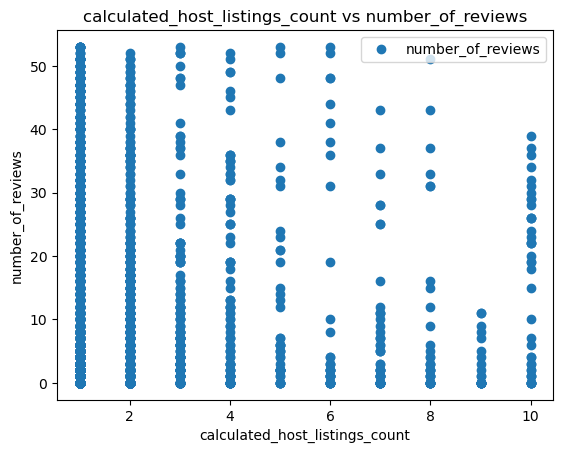

In [36]:
listings_24.plot(x = 'calculated_host_listings_count' , y='number_of_reviews',style='o') 
plt.title('calculated_host_listings_count vs number_of_reviews')  
plt.xlabel('calculated_host_listings_count')  
plt.ylabel('number_of_reviews')  
plt.show()

My hypothesis is that the more properties a host owns, the more reviews they will have. 

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = listings_24['calculated_host_listings_count'].values.reshape(-1,1)
y = listings_24['number_of_reviews'].values.reshape(-1,1)

In [38]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [39]:
# Create a regression object.

regression = LinearRegression()  

In [40]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

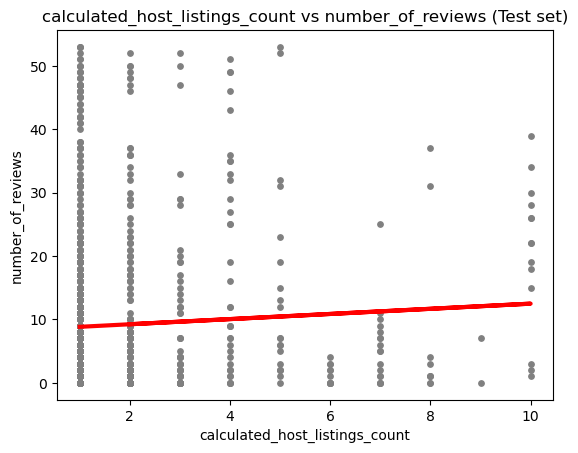

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('calculated_host_listings_count vs number_of_reviews (Test set)')
plot_test.xlabel('calculated_host_listings_count')
plot_test.ylabel('number_of_reviews')
plot_test.show()

In [50]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [57]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.40617202]]
Mean squared error:  150.39459251181
R2 score:  0.0027199462027495125


The relatively large Mean Squared Error of 150.39 indicates that the regression line is far from the data points and therefore is unlikely an accurate representation of the data. 

Additionally, the R2 score is very close to 0 which further points toward a poor fit. 

In [52]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6,8.826246
1,26,8.826246
2,2,8.826246
3,0,8.826246
4,0,8.826246
5,0,8.826246
6,3,9.638590
7,20,8.826246
8,4,8.826246
9,7,9.638590


In [58]:
y_predicted_train = regression.predict(X_train)

In [54]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [55]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.40617202]]
Mean squared error:  150.39459251181
R2 score:  0.0027199462027495125


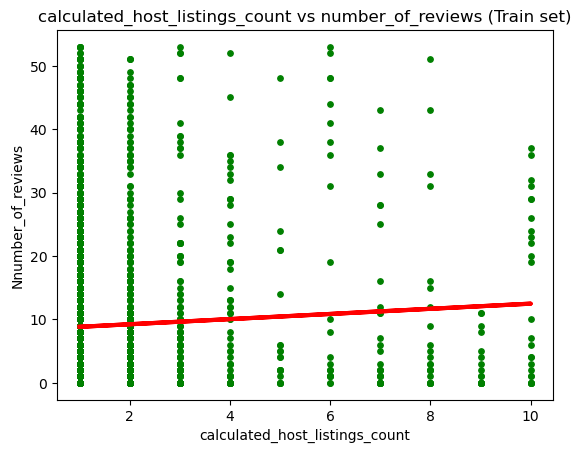

In [56]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('calculated_host_listings_count vs number_of_reviews (Train set)')
plot_test.xlabel('calculated_host_listings_count')
plot_test.ylabel('Nnumber_of_reviews')
plot_test.show()

Overall, a model with more dimensionality is required to assess this information and accurately answer the question.